# Assignment 1: Basic EDA

1. Read in the "Computers.csv" file. 
2. Explore the target variable, "price". Look at a histogram and boxplot of it.
3. Then, produce histograms of the 'speed' and 'ram' variables. 
4. Feel free to further explore the dataset!

In [2]:
import pandas as pd

computers = pd.read_csv("../Data/Computers.csv")
computers.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [7]:
computers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    6259 non-null   int64 
 1   speed    6259 non-null   int64 
 2   hd       6259 non-null   int64 
 3   ram      6259 non-null   int64 
 4   screen   6259 non-null   int64 
 5   cd       6259 non-null   object
 6   multi    6259 non-null   object
 7   premium  6259 non-null   object
 8   ads      6259 non-null   int64 
 9   trend    6259 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 489.1+ KB


In [8]:
computers.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


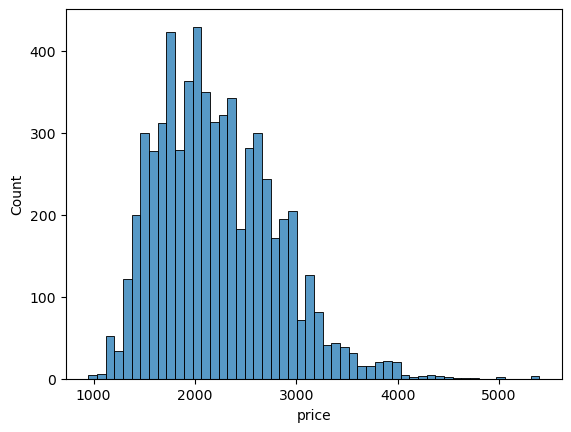

In [10]:
import seaborn as sns

sns.histplot(x=computers['price']);

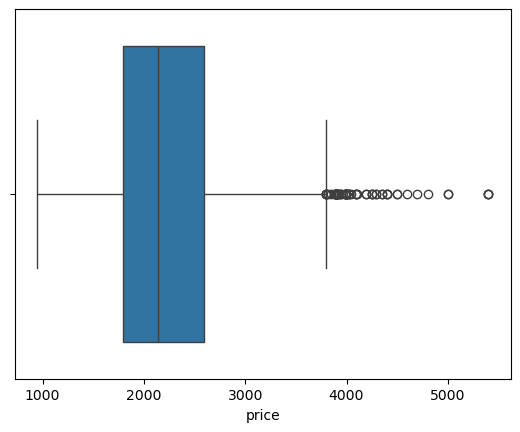

In [11]:
sns.boxplot(x=computers['price']);

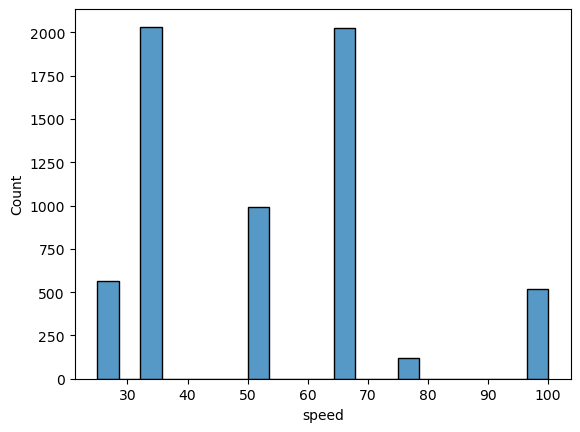

In [5]:
sns.histplot(x=computers['speed']);

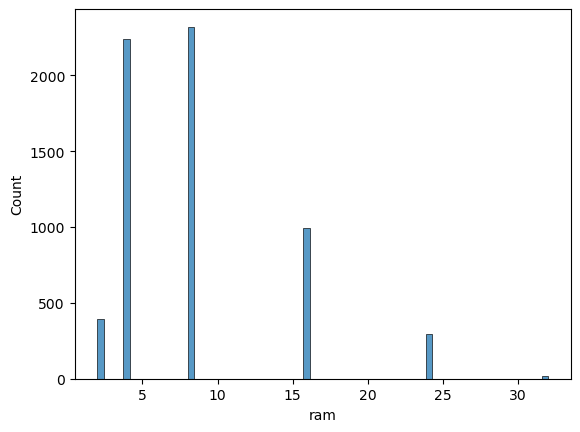

In [6]:
sns.histplot(x=computers['ram']);

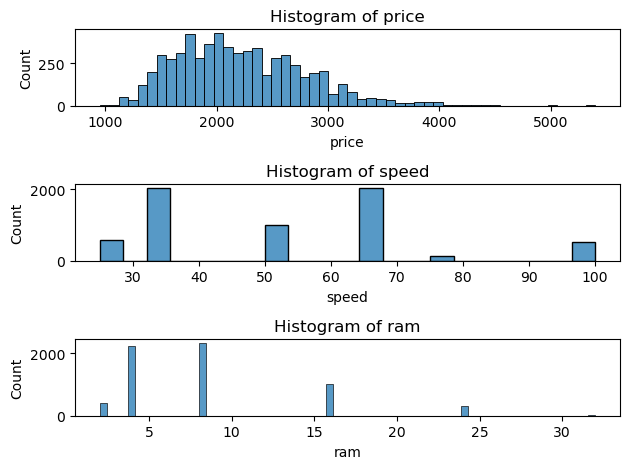

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['price', 'speed', 'ram']
data = computers

fig, ax = plt.subplots(len(columns), layout='tight')

for col, ax in zip(columns, ax.flat):
    sns.histplot(data=data, x=col, ax=ax)
    ax.set_title(f"Histogram of {col}")

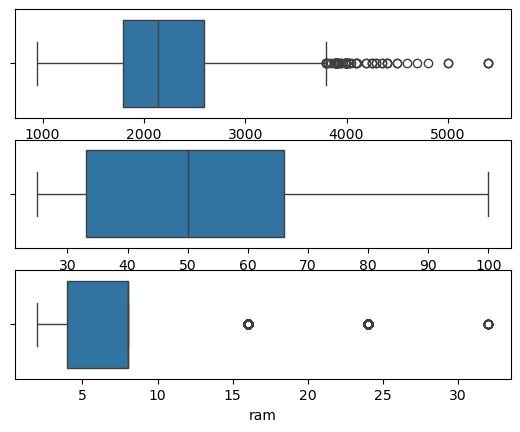

In [13]:
fig, ax = plt.subplots(3)

for col, ax in zip(columns, ax.flat):
    sns.boxplot(data=data, x=col, ax=ax)

## Assignment 2: Variable Relationships

1. Build a correlation matrix of numeric features and pass it into a heatmap
2. Build a pairplot of numeric features in the data. Hint: df.select_dtypes("number") selects numeric columns. Consider sampling with df.sample(1000) to speed this up if it takes too long.
3. Build an lmplot of ram vs. price. Does being a premium model (premium == 'yes') impact this relationship? 

In [15]:
import pandas as pd
import seaborn as sns

computers = pd.read_csv('../Data/Computers.csv')
computers.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


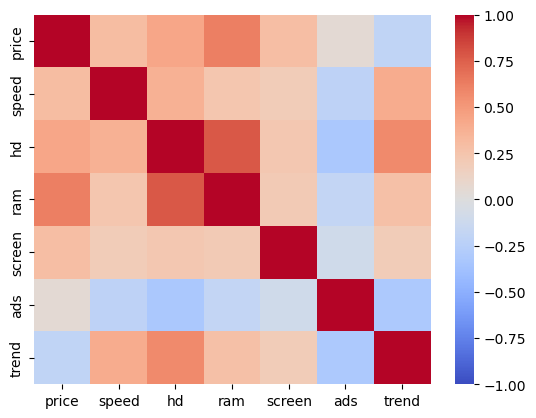

In [21]:
sns.heatmap(computers.corr(numeric_only=True), vmin=-1, vmax=1, cmap='coolwarm');

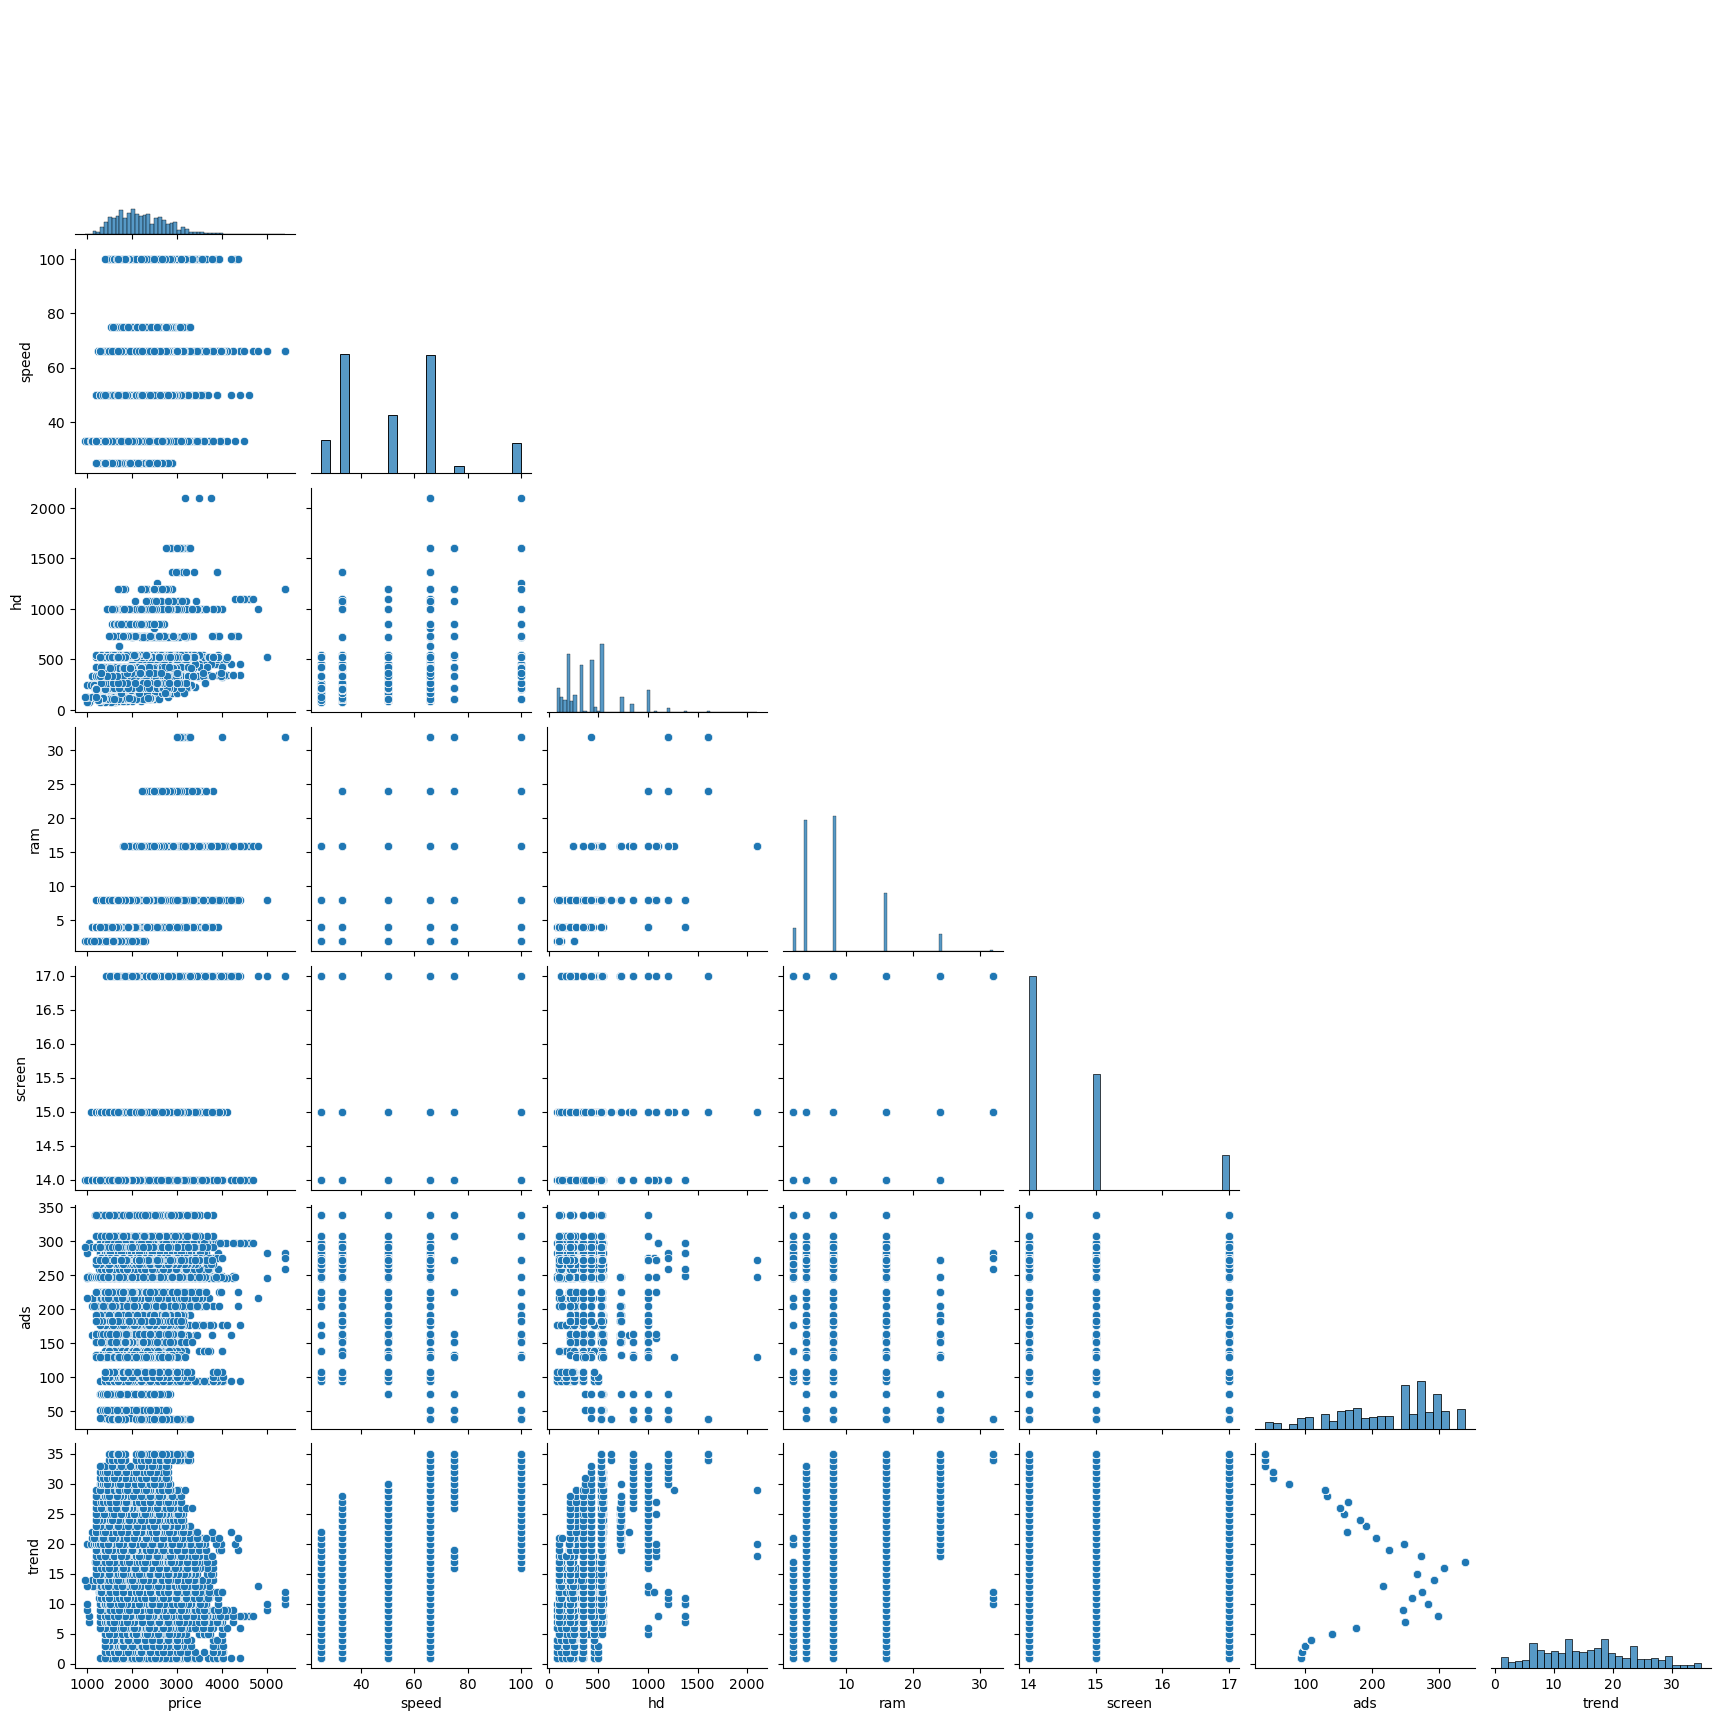

In [23]:
#sns.pairplot(computers);
sns.pairplot(computers.select_dtypes('number'), corner=True);

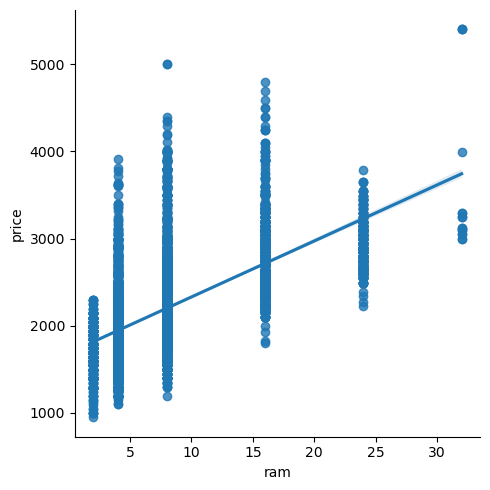

In [25]:
sns.lmplot(computers, x='ram', y='price');

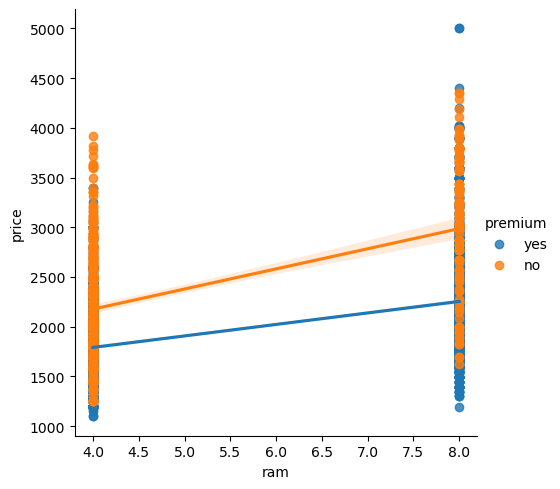

In [29]:
sns.lmplot(computers.query('3 < ram < 11'), x='ram', y='price', hue='premium');